### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing data

In [2]:
df = pd.read_pickle (r"C:\Users\user\Desktop\Data Analytics\02-12-2023 Instacart Basket Analysis\02 Data\Prepared data\orders_products_combined4.pkl")

### Contents
#### 1. Bar chart 'orders_day_of_week'
#### 2. Histogram and scatterplot of 'prices'
#### 3. Sample subsets and line charts
#### 4. Histogram of the 'hour_of_day'
#### 5. Bar chart 'loyalty_flag'
#### 6. Line chart for expenditure depending on hour of the day
#### 7. Line chart of connection between age and family situation
#### 8. Scatterplot of connection between age and income

### 1. Bar chart 'orders_day_of_week'

<Axes: xlabel='orders_day_of_week'>

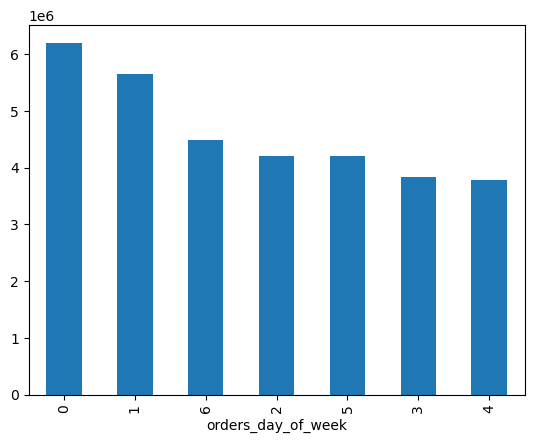

In [3]:
df['orders_day_of_week'].value_counts().plot.bar()

### 2. Histogram and scatterplot of 'prices'

<Axes: ylabel='Frequency'>

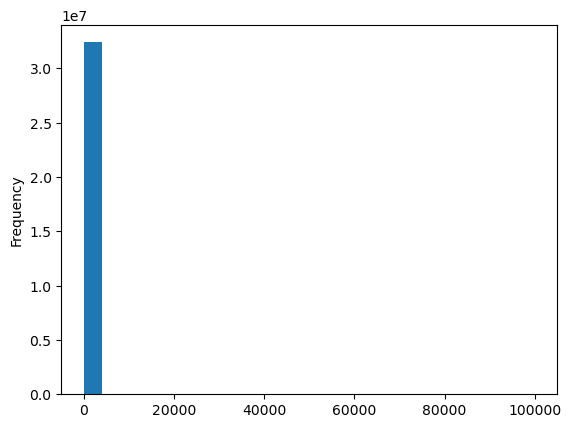

In [6]:
#Creating a histogram for prices with outliers
df['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

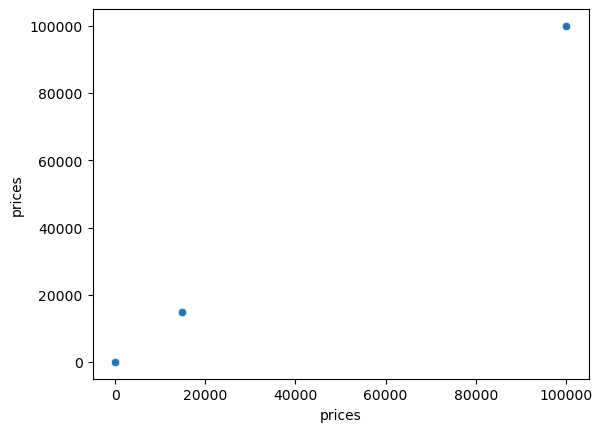

In [7]:
#Creating a scatter plot for prices with outliers
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [3]:
#Checking for prices higher than 100
df.loc[df['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,loyalty_flag,avg_price,spending_habit,med_days,order_frequency,STATE,Age,# of dependants,fam_status,income
7805,1435153,1519,26,2,11,6.000000,21553,15,0,both,...,Loyal customer,50.932895,High spender,6.000000,Frequent customer,Rhode Island,68,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.000000,21553,28,1,both,...,Loyal customer,50.932895,High spender,6.000000,Frequent customer,Rhode Island,68,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.000000,21553,1,0,both,...,Loyal customer,35.233761,High spender,5.000000,Frequent customer,Hawaii,55,2,married,230074
20264,965345,3531,27,2,19,8.000000,33664,2,0,both,...,Regular customer,267.469870,High spender,10.000000,Frequent customer,Hawaii,80,2,married,233776
20497,2943740,3793,1,2,9,11.114836,21553,3,0,both,...,Regular customer,71.191102,High spender,11.114836,Regular customer,Louisiana,59,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.000000,33664,2,1,both,...,New customer,6390.138298,High spender,11.114836,Regular customer,Rhode Island,58,1,married,207497
32307882,1179092,131671,12,4,9,15.000000,33664,1,0,both,...,Regular customer,3453.431034,High spender,13.000000,Regular customer,Rhode Island,35,0,single,86490
32310810,1226705,39667,7,2,15,20.000000,33664,14,0,both,...,New customer,1223.879268,High spender,23.000000,Non-frequent customer,Rhode Island,78,2,married,195077
32330048,3000037,95105,2,4,19,22.000000,33664,4,0,both,...,New customer,11772.100000,High spender,6.000000,Frequent customer,South Carolina,48,2,married,398880


In [4]:
#Turning outliers (items priced over 100) into NaN's
df.loc[df['prices'] >100, 'prices'] = np.nan

In [5]:
#Checking if successful
df['prices'].max()

25.0

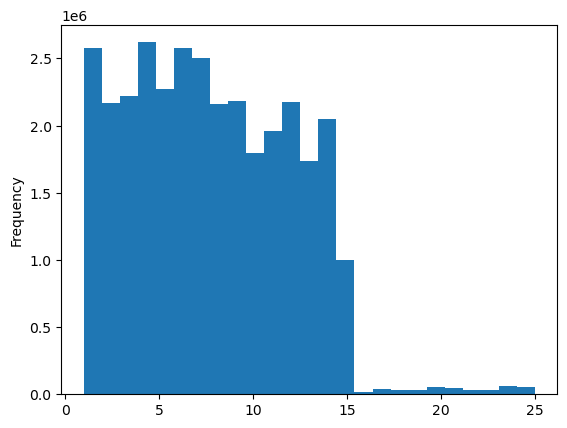

In [13]:
#Creating a histogram without outliers
hist = df['prices'].plot.hist(bins = 25)

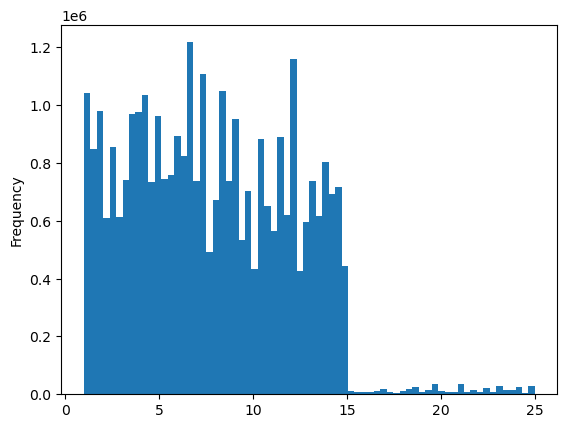

In [14]:
#Increasing level of granularity
hist = df['prices'].plot.hist(bins = 70)

### 3. Sample subsets and line charts

In [6]:
#Creating a sample subset due to dataframe size
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [16]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [7]:
# Store 70% of the sample in dataframe big 
big = df[dev]

In [8]:
# Store 30% of the sample in dataframe small
small = df[~dev]

In [9]:
#Checking if successful
len(df)

32404859

In [10]:
len(big) + len(small)

32404859

In [21]:
#Reducing the sample to needed columns only
df_2 = small[['orders_day_of_week','prices']]

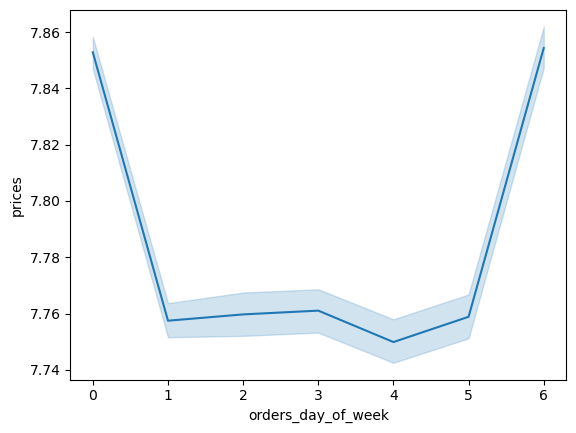

In [22]:
#Creating a line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

### 4. Histogram of the 'hour_of_day'

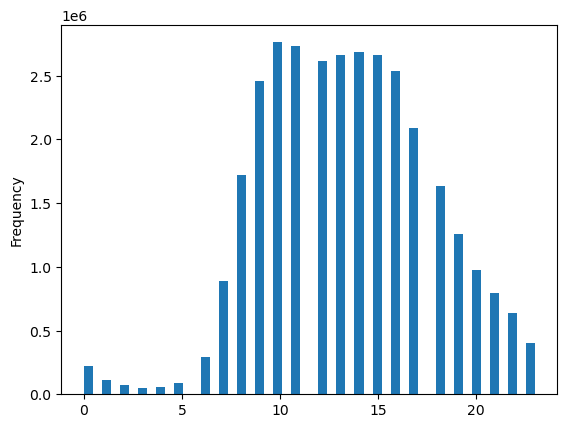

In [38]:
bar_hourofday = df['hour_of_day'].plot.hist(bins = 50)

In [39]:
#Exporting bar chart above
bar_hourofday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hourofday.png'))

###### Histogram clearely shows that most of the orders are placed between 10 and 17 o'clock

### 5. Bar chart 'loyalty_flag'

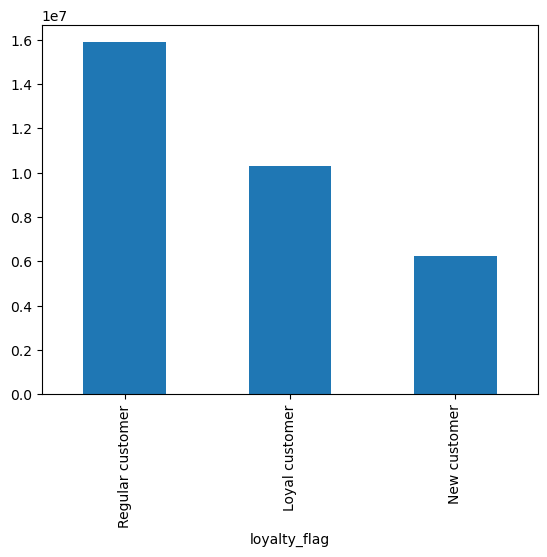

In [40]:
bar_loy = df['loyalty_flag'].value_counts().plot.bar()

In [41]:
#Exporting bar chart above
bar_loy.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loy.png'))

### 6. Line chart for expenditure depending on hour of the day

In [43]:
#Reducing the sample to needed columns only
df_3 = small[['hour_of_day','prices']]

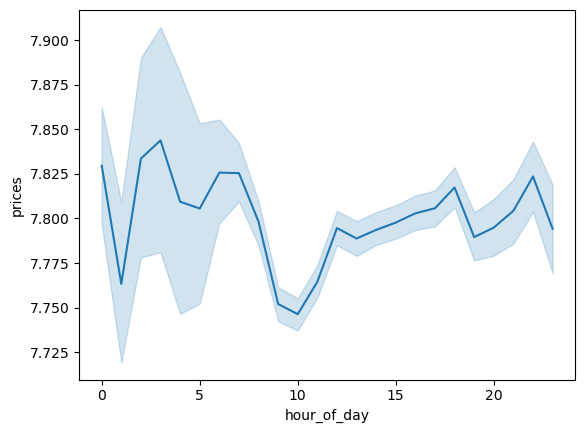

In [45]:
# Prices and hour_of_day line chart
line = sns.lineplot(data = df_3, x = 'hour_of_day',y = 'prices')

#### Most expensive products are usually bought by night

In [46]:
#Exporting line chart above
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hourod.png'))

### 7. Line chart of connection between age and family situation

In [47]:
#Reducing the sample to needed columns only
df_4 = small[['Age','fam_status']]

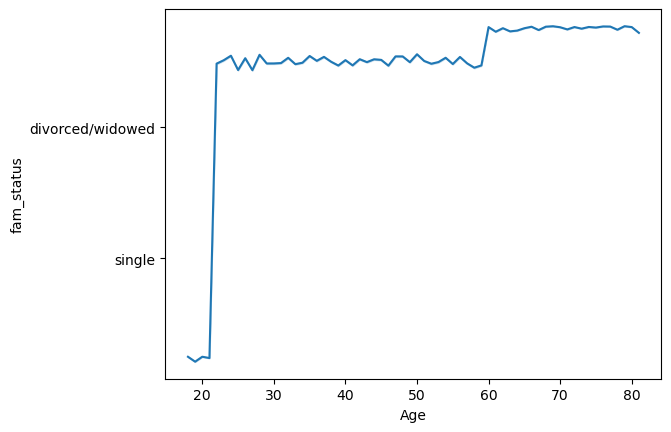

In [48]:
# Prices and hour_of_day line chart
line2 = sns.lineplot(data = df_4, x = 'Age',y = 'fam_status')

##### Customers in early twenties tend to be single

In [49]:
#Exporting bar chart above
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_famsit.png'))

### 8. Scatterplot of connection between age and income

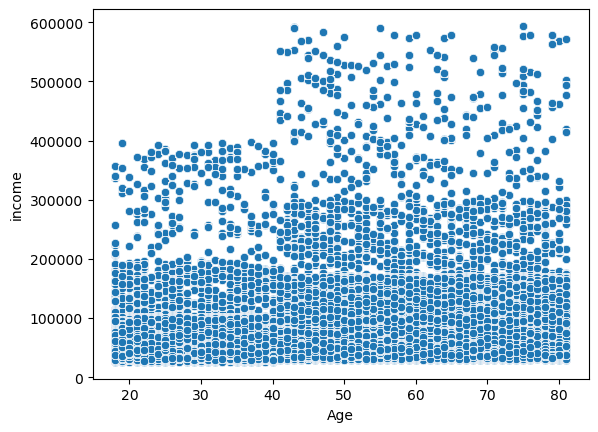

In [52]:
sct = sns.scatterplot(x = 'Age', y = 'income',data = df)

#### Scatterplot shows us that customers over 40 have a significantly higher income.

In [53]:
#Exporting scatterplot above
sct.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

### Exporting 

In [11]:
path = r"C:\Users\user\Desktop\Data Analytics\02-12-2023 Instacart Basket Analysis"

In [12]:
#Exporting data to pickle
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_done.pkl'))